______
# 06. Modules & Packages
______
Modular programming refers to the process of breaking a large, unwieldy programming task into smaller and more manageable subtasks. In Python, we usually separate batches of related functions into a number of individual modules, which can then be combined together to create a larger application, such as a package. 

There are several advantages to modularizing code in a large application:

1. ***Simplicity***: Rather than focusing on the entire problem at hand, a module typically focuses on one relatively small portion of the problem, meaning that it is easier to wrap your head around it and debug any issues. Essentially, this makes the development easier and less error-prone.
    
2. ***Maintainability***: Modules are typically designed so that they enforce logical boundaries between different problem domains. If modules are written in a way that minimizes interdependency, there is decreased likelihood that modifications to a single module will have an impact on other parts of the program. (You may even be able to make changes to a module without having any knowledge of the application outside that module.) This makes it more viable for a team of many programmers to work collaboratively on a large application.

3. ***Reusability***: Functionality defined in a single module can be easily reused (through an appropriately defined interface) by other parts of the application. This eliminates the need to recreate duplicate code.

4. ***Scoping***: Modules typically define a separate namespace, which helps avoid collisions between identifiers in different areas of a program. (One of the tenets in the Zen of Python is Namespaces are one honking great idea—let’s do more of those!)

There are actually three different ways to define a module in Python, but all if them are ***loaded using the `import`*** statement:

1. A module can be written in Python itself.
2. A module can be written in C and loaded dynamically at run-time, like the re (regular expression) module.
3. A built-in module is intrinsically contained in the interpreter, like the itertools module.

Here, we will mostly focus on 1 and 3, the modules that are written in Python or the built-ins, such as `math` or `itertools`.

## Importing from Python's Standard Library

Python's standard library contains many useful built-in modules, which you can read about fully in [Python's documentation](https://docs.python.org/3/library/).
Any of these can be imported with the ``import`` statement, and then explored using the help function seen in the previous section. Here is an extremely incomplete list of some of the modules you might want to check more thoroughly (some of them you've already seen in the previous notebooks).

- ``os`` and ``sys``: Tools for interfacing with the operating system, including navigating file directory structures and executing shell commands
- ``math`` and ``cmath``: Mathematical functions and operations on real and complex numbers
- ``itertools``: Tools for constructing and interacting with iterators and generators
- ``functools``: Tools that assist with functional programming
- ``random``: Tools for generating pseudorandom numbers
- ``pickle``: Tools for object persistence: saving objects to and loading objects from disk
- ``json`` and ``csv``: Tools for reading JSON-formatted and CSV-formatted files.
- ``urllib``: Tools for doing HTTP and other web requests.

In [ ]:
import os
import math

## Importing from Third-Party Modules
These can be imported just as the built-in modules, but they have to be installed on your system first. The standard registry for such modules is the [Python Package Index](http://pypi.python.org/) (*PyPI* for short), and Python comes with a program ``pip``, which will automatically fetch packages released and listed on PyPI.

### `Autotiming` with Jupyter
For example, if you'd like to install the ``autotime``, an automatic timer for Jupyter Notebook cells, all you need to do is to type the following at the command line on your anaconda promp (terminal):

**`N.B.`** Activate your environment first!

```
$ pip install ipython-autotime
```

The source code for the package will be automatically downloaded from the PyPI repository, and the package installed in the standard Python path (assuming you have permission to do so on the computer you're using).
    
**`N.B.`** To use `autotime`, you will also have to add this line at the top of the notebook near the imports and running the cell:
    
    %load_ext autotime

In [ ]:
import autotime
%load_ext autotime

In [ ]:
import numpy

## `Example` -  Storing a function in a module
Create a `pizza.py` file in the present directory with the following code:

In [ ]:
def make_pizza(size, *toppings):
    """Make a pizza."""
    print("\nMaking a " + size + " pizza.")
    print("Toppings:")
    for topping in toppings:
        print("- " + topping)

### Types: `Explicit import of the module`
Explicit import of a module preserves the module's content in a namespace.
The namespace is then used to refer to its contents with a "``.``" between them.
For example, here we'll import the built-in ``math`` module and compute the cosine of pi:

In [ ]:
import math
math.cos(math.pi)

In [ ]:
import pizza
pizza.make_pizza('medium', 'pepperoni')
pizza.make_pizza('small', 'bacon', 'pineapple')

In cases where the model name is very long, it might be also useful to use an alias for it:
    
    import ... as ...
    
In fact, some of the more popular libraries have well known conventions for the aliases to shorten the module names. E.g., the NumPy (Numerical Python) package, a popular third-party package useful for data science, is by convention imported under the alias ``np``:

In [ ]:
import numpy as np
np.cos(np.pi)

In [ ]:
import pizza as p
p.make_pizza('medium', 'pepperoni')
p.make_pizza('small', 'bacon', 'pineapple')

## Types: `Explicit import of the module contents`
Sometimes rather than importing the module namespace, you would just like to import a few particular items from the module. This can be done with the "``from ... import ...``" pattern.

For example, we can import just the ``cos`` function and the ``pi`` constant from the ``math`` module:

In [ ]:
from math import cos, pi
cos(pi)

In [ ]:
from pizza import make_pizza
make_pizza('medium', 'pepperoni')
make_pizza('small', 'bacon', 'pineapple')

In [ ]:
from pizza import make_pizza as mp
mp('medium', 'pepperoni')
mp('small', 'bacon', 'pineapple')

## Types: `Implicit import of the module contents`
Finally, it is sometimes useful to import the entirety of the module contents into the local namespace.
This can be done with the "``from ... import *``" pattern:

In [ ]:
from math import *
sin(pi) ** 2 + cos(pi) ** 2

In [ ]:
from pizza import *
make_pizza('medium', 'pepperoni')
make_pizza('small', 'bacon', 'pineapple')

However, this should be used rarely, if at all, since these may overwrite function names that you do not intend to overwrite, and the implicitness of the statement makes it difficult to determine what has changed.

For example, Python has a built-in ``sum`` function that can be used for various operations:

In [ ]:
help(sum)

We can use this to compute the sum of a sequence, starting with a certain value (here, we'll start with ``-1``):

In [ ]:
sum(range(5), -1)

Now observe what happens if we make the *exact same function call* after importing ``*`` from ``numpy``:

In [ ]:
from numpy import *

In [ ]:
sum(range(5), -1)

The result is off by one!
The reason for this is that the ``import *`` statement *replaces* the built-in ``sum`` function with the ``numpy.sum`` function, which has a different call signature: in the former, we're summing ``range(5)`` starting at ``-1``; in the latter, we're summing ``range(5)`` along the last axis (indicated by ``-1``).

This is the type of situation that may arise if care is not taken when using "``import *``" – for this reason, it is best to avoid this unless you know exactly what you are doing.

## Variables in a Module

The module can contain functions, as already described, but also variables of all types (arrays, dictionaries, objects etc). E.g., save the code below to the `pizza.py` module:

In [ ]:
buyer = {
  "name": "John",
  "age": 25,
  "country": "London"
} 

In [ ]:
import pizza
a = mymodule.buyer["age"]
print(a) 

## Module Contents
`dir()` lists all of the defined names belonging to the input module:

In [ ]:
dir(math)

## The Module Search Path
Continuing with the above example, let’s take a look at what happens when Python executes the statement:

In [ ]:
import pizza

When the interpreter executes the above import statement, it searches for `pizza.py` in a list of directories assembled from the following sources:

- The directory from which the input script was run or the current directory if the interpreter is being run interactively.
- The list of directories contained in the `PYTHONPATH` environment variable, if it is set. (The format for `PYTHONPATH` is OS-dependent but should mimic the `PATH` environment variable.)
- An installation-dependent list of directories configured at the time Python is installed.

The resulting search path is accessible in the Python variable `pizza.path`, which is obtained from a module named `os`:

In [ ]:
pizza.path

**Note:** The exact contents of os.path are installation-dependent, so they will almost certainly look different on your computer.

Thus, to ensure your module is found, you need to do one of the following:

- Put `pizza.py` in the directory where the input script is located or the current directory, if interactive.
- Modify the `PYTHONPATH` environment variable to contain the directory where `pizza.py` is located before starting the interpreter or put `pizza.py` in one of the directories already contained in the PYTHONPATH variable.
- Put `pizza.py` in one of the installation-dependent directories, which you may or may not have write-access to, depending on the OS


Once a module has been imported, you can determine the location where it was found with the module’s `__file__` attribute:

In [ ]:
pizza.__file__

In [ ]:
os.__file__

## Executing a Module as a Script
Any `.py` file that contains a **module** is essentially also a Python **script**. Let's say we define a `module.py` having the following code:

In [ ]:
s = "I will meet you on the dark side of the moon."
a = [100, 200, 300]

def func(arg):
    print(f'arg = {arg}')

Now, this can be run as a script:

    C:\Users\povilas\Desktop\CA_AI_2020>python mod.py
    C:\Users\povilas\Desktop\CA_AI_2020>

If there are no errors, it must have worked. However, it only defines an object and does not do anything with it nor it generates any output.

Let's modify it:

In [ ]:
s = "I will meet you on the dark side of the moon."
a = [100, 200, 300]

def func(arg):
    print(f'arg = {arg}')
    
print(s)
print(a)
func('quux')

However, now it also generates output when it is imported:
    
    >>> import mod

When a `.py` file is imported as a module, Python sets the special dunder variable `__name__` to the name of the module. However, if a file is run as a standalone script, `__name__` is (creatively) set to the string `'__main__'`. Using this fact, you can distinguish between when the file is loaded as a module and when it is run as a standalone script at run-time (and alter behavior accordingly):

In [ ]:
s = "I will meet you on the dark side of the moon."
a = [100, 200, 300]

def func(arg):
    print(f'arg = {arg}')

if __name__ == '__main__':
    print('Executing as standalone script')
    print(s)
    print(a)
    foo('quux')

Now try running the script and importing it as a module again like previously and you will see that its behaviour has changed. Let's see another example using a function that you have met previously `factorial` (add the following code to a file `factorial.py`):

In [ ]:
def factorial(n):
    return 1 if n == 1 else n * fact(n-1)

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        print(fact(int(sys.argv[1])))

Now, the `factorial()` can be imported as a module (including it's functions):

In [ ]:
from factorial import factorial

As well as capable of being run standalone by passing an integer argument on the command-line for testing:

    C:\Users\povilas\Desktop\CA_AI_2020>python factorial.py 6


## Reloading a Module
For reasons of efficiency, a module is only loaded once per interpreter session. That is fine for function and class definitions, which typically make up the bulk of a module’s contents. But a module can contain executable statements as well, usually for initialization. Be aware that these statements will only be executed the first time a module is imported.

`mod.py`

    a = [100, 200, 300]
    print('a =', a)

In [ ]:
import mod

In [ ]:
import mod

In [ ]:
mod.a

The `print()` statement gets executed only once (not on subsequent imports). However, displaying the value of `mod.a` we can see that it still gets assigned and kept. 

If you make a change to a module and need to reload i, you either need to restart the interpreter, or use a function called `reload()` from the module `importlib`:

In [ ]:
import importlib

In [ ]:
importlib.reload(mod)

# Packages 
Suppose you have developed a very large application that includes many modules. As the number of modules grows, it becomes difficult to keep track of them all if they are dumped into one location. This is particularly so if they have similar names or functionality. You might wish for a means of grouping and organizing them.

**Packages** allow for a hierarchical structuring of the module namespace using **dot notation**. In the same way that **modules** help avoid collisions between global variable names, **packages** help avoid collisions between module names.

Creating a **package** is quite straightforward, since it makes use of the operating system’s inherent hierarchical file structure:

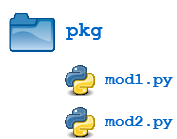

There is a directory named `pkg` that contains two modules, `mod1.py` and `mod2.py`.

Given that `pkg` directory resides in a location where it can be gound (e.g., in one of the directories contained in `sys.path`), you can refer to these 2 modules with dot notation (`pkg.mod1`, `pkg.mod2`) and import them with:

    import <module_name>[, <module_name> ...]

In [ ]:
import pkg.mod1, pkg.mod2

In [ ]:
# pkg.mod1....

In [ ]:
# pkg.mod2.....

    from <module_name> import <name(s)>

    from <module_name> import <name> as <alt_name>

    from <package_name> import <modules_name>[, <module_name> ...]
    from <package_name> import <module_name> as <alt_name>

    import <package_name>
    
Is also possible, but it does not place any of the package modules into the local namespace.

## Package Initialization
If a file named `__init__.py` is present in a package directory, it is invoked when the package or a module in the package is imported. This can be used for execution of package initialization code, such as initialization of package-level data.

For example, consider the following `__init__.py` file:

    `__init__.py`

In [ ]:
print(f'Invoking __init__.py for {__name__}')
A = ['quux', 'corge', 'grault']

Let’s add this file to the pkg directory from the above example:

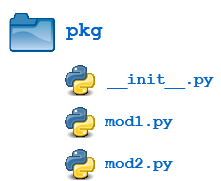


Now when the package is imported, global list `A` defined above is initialized, and this can be accessed by the usual import:

`mod1.py`

In [ ]:
def foo():
    from pkg import A
    print('[mod1] foo() / A = ', A)

`__init__.py` can also be used to effect automatic importing of modules from a package. For example, earlier you saw that the statement `import pkg` only places the name pkg in the caller’s local symbol table and doesn’t import any modules. But if `__init__.py` in the `pkg` directory contains the following:

`__init__.py`

In [ ]:
print(f'Invoking __init__.py for {__name__}')
import pkg.mod1, pkg.mod2

In [ ]:
import pkg

In [ ]:
pkg.mod1

In [ ]:
pkg.mod2

**N.B.**: Much of the Python documentation states that an __init__.py file must be present in the package directory when creating a package, but this is not true anymore. It used to be that the very presence of __init__.py signified to Python that a package was being defined. The file could contain initialization code or even be empty, but it had to be present.

Starting with Python 3.3, Implicit Namespace Packages were introduced. These allow for the creation of a package without any __init__.py file. Of course, it can still be present if package initialization is needed. 

## Importing * From a Package
For the purposes of the following discussion, the previously defined package is expanded to contain some additional modules:

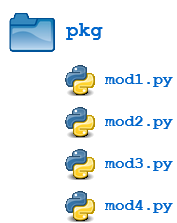

There are now four modules defined in the pkg directory. Their contents are as shown below:


`mod1.py`

    def foo():
        print('[mod1] foo()')

    class Foo:
        pass

`mod2.py`

    def bar():
        print('[mod2] bar()')

    class Bar:
        pass

`mod3.py`

    def baz():
        print('[mod3] baz()')

    class Baz:
        pass

`mod4.py`

    def qux():
        print('[mod4] qux()')

    class Qux:
        pass
        
You have already seen that when `import *` is used for a **module**, *all* objects from the module are imported into the local symbol table, except those whose names begin with an underscore, as always:

In [ ]:
dir()

In [ ]:
from pkg.mod3 import *

In [ ]:
dir()

In [ ]:
baz()

In [ ]:
Baz

The analogous statement for a **package** is this:

        from <package_name> import *
        
Let's try this:

In [ ]:
dir()

In [ ]:
from pkg import *

In [ ]:
dir()

Hmm...Nothing really happens, whilst you might have expected that Python would dive down into the package directory, find all the modules, and import them. By default that is not what happens.

Instead, Python follows this convention: 

If the `__init__.py` file in the package directory contains a list named `__all__`, it is taken to be a list of modules that should be imported when the statement from `<package_name> import *` is encountered.

For the present example, suppose you create an `__init__.py` in the `pkg` directory like this:


`pkg/__init__.py`

    __all__ = [
            'mod1',
            'mod2',
            'mod3',
            'mod4'
            ]

Now try the previous import statement:

In [ ]:
dir()

In [ ]:
from pkg import *

In [ ]:
dir()

In [ ]:
mod2.bar()

In [ ]:
mod4.Qux

Using `import *` still isn’t considered terrific form, any more for packages than for modules. But this facility at least gives the creator of the package some control over what happens when `import *` is specified. In fact, it provides the capability to disallow it entirely, simply by declining to define __all__ at all. As you have seen, the default behavior for packages is to import nothing.

By the way, `__all__` can be defined in a module as well and serves the same purpose: to control what is imported with `import *`. For example, modify `mod1.py` as follows:


`pkg/mod1.py`

    __all__ = ['foo']

    def foo():
        print('[mod1] foo()')

    class Foo:
        pass
        
Now an `import *` statement `from pkg.mod1` will only import what is contained in `__all__`:

In [ ]:
dir()

In [ ]:
from pkg.mod1 import *

In [ ]:
dir()

In [ ]:
foo()

In [ ]:
Foo

`foo()` (the function) is now defined in the local namespace, but Foo (the class) is not, because the latter is not in `__all__`.

In summary, `__all__` is used by both **packages** and **modules** to control what is imported when `import *` is specified. But the default behavior differs:

    For a package, when __all__ is not defined, import * does not import anything.
    For a module, when __all__ is not defined, import * imports everything (except—you guessed it—names starting with an underscore).

## Subpackages
Packages can contain nested **subpackages** to arbitrary depth. For example, let’s make one more modification to the example **package** directory as follows:

`pkg`

    `sub_pkg1`
        mod1.py
        mod2.py
     
     `sub_pkg2`
        mod3.py
        mod4.py 
        
Importing still works the same as shown previously. Syntax is similar, but additional **dot notation** is used to separate **package** name from **subpackage** name:

In [ ]:
import pkg.sub_pkg1.mod1

In [ ]:
pkg.sub_pkg1.mod1.foo()

In [ ]:
from pkg.sub_pkg1 import mod2

In [ ]:
mod2.bar()

In [ ]:
from pkg.sub_pkg2.mod3 import baz

In [ ]:
baz()

In [ ]:
from pkg.sub_pkg2.mod4 import qux as grault

In [ ]:
grault()

In addition, a module in one **subpackage** can reference objects in a **sibling** **subpackage** (in the event that the sibling contains some functionality that you need). For example, suppose you want to import and execute function `foo()` (defined in module `mod1`) from within module `mod3`. You can either use an **absolute import**:

`pkg/sub__pkg2/mod3.py`

    def baz():
        print('[mod3] baz()')

    class Baz:
        pass

    from pkg.sub_pkg1.mod1 import foo
    foo()


In [ ]:
from pkg.sub_pkg2 import mod3

In [ ]:
mod3.foo()

Or you can use a **relative import**, where `..` refers to the package one level up. From within `mod3.py`, which is in subpackage `sub_pkg2`,

    .. evaluates to the parent package (pkg), and
    ..sub_pkg1 evaluates to subpackage sub_pkg1 of the parent package.

`pkg/sub__pkg2/mod3.py`

    def baz():
        print('[mod3] baz()')

    class Baz:
        pass

    from .. import sub_pkg1
    print(sub_pkg1)

    from ..sub_pkg1.mod1 import foo
    foo()



In [ ]:
from pkg.sub_pkg2 import mod3

For more info about Python Modules & Packages, check this [Real Python Tutorial](https://realpython.com/python-modules-packages/), from which a large amount of the presented material was taken.